# <font color='#F5DEB3'>1. Подключение библиотек, загрузка данных

## <font color='#B8860B'>1.1 Подключение библиотек

In [64]:
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

import time
import random
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import keras
from keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## <font color='#B8860B'>1.2 Инициализация параметров сети и выборки данных

In [66]:
# размерность изображений
HEIGHT, WIDTH = (64, 64)
image_size = (HEIGHT, WIDTH)
NUM_CLASSES = 58

# число для случайного перемешивания
seed = 2023

# количество цветовых каналов входных изображений, для RGB = 3
num_of_channels = 3

# Параметры обучения
## Коэффициент изменения градиента
LEARNING_RATE = 1e-4
## размер батча
BATCH_SIZE = 64
## автоматическое изменение параметров
AUTOTUNE = tf.data.AUTOTUNE

all_path = "/content/drive/MyDrive/Colab Notebooks/"
data_path = "/content/trafic_signs_dataset/"

## <font color='#B8860B'>1.3 Загрузка данных в буферную память

In [67]:
!rm -r  "/content/trafic_signs_data"

In [68]:
dataset_name = 'trafic_signs_data'
try:
    list_of_dirs = os.listdir(path=f"/content/{dataset_name}")
except:
    !unzip "/content/drive/MyDrive/Colab Notebooks/CV_LB4_data/trafic_signs_data.zip" -d "/content"

print(os.listdir(path=f"/content/{dataset_name}"))

Archive:  /content/drive/MyDrive/Colab Notebooks/CV_LB4_data/trafic_signs_data.zip
   creating: /content/trafic_signs_data/
   creating: /content/trafic_signs_data/images/
   creating: /content/trafic_signs_data/images/10/
 extracting: /content/trafic_signs_data/images/10/001.png  
 extracting: /content/trafic_signs_data/images/10/002.png  
 extracting: /content/trafic_signs_data/images/10/003.png  
 extracting: /content/trafic_signs_data/images/10/004.png  
 extracting: /content/trafic_signs_data/images/10/005.png  
 extracting: /content/trafic_signs_data/images/10/006.png  
 extracting: /content/trafic_signs_data/images/10/007.png  
 extracting: /content/trafic_signs_data/images/10/008.png  
 extracting: /content/trafic_signs_data/images/10/009.png  
 extracting: /content/trafic_signs_data/images/10/010.png  
 extracting: /content/trafic_signs_data/images/10/011.png  
 extracting: /content/trafic_signs_data/images/10/012.png  
 extracting: /content/trafic_signs_data/images/10/013.png

## <font color='#B8860B'>1.4 Загрузка в тензоры TensorFlow из буферной памяти

### <font color='Gold'> 1.4.1 Загрузка данных по путям

In [69]:
images = image_dataset_from_directory(f'/content/{dataset_name}/images',
                                      batch_size=BATCH_SIZE,
                                      image_size=(HEIGHT, WIDTH),
                                      seed=seed,
                                      shuffle=True
                                      )

images

Found 4170 files belonging to 58 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [70]:
class_names = images.class_names
print(class_names)

['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67']


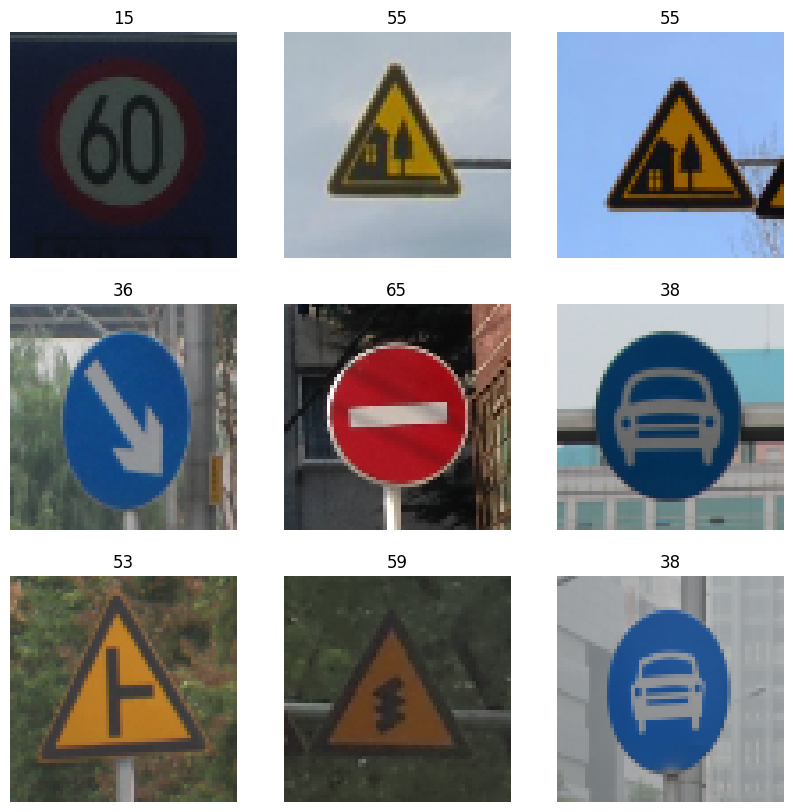

In [71]:
plt.figure(figsize=(10, 10))
for image, label in images.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(image[i]).astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

### <font color='Gold'> 1.4.2 Словарь - декодер

In [72]:
class_decoder = {'10': 'speed_limit_(5km/h)',
                 '11': 'speed_limit_(15km/h)',
                 '12': 'speed_limit_(30km/h)',
                 '13': 'speed_limit_(40km/h)',
                 '14': 'speed_limit_(50km/h)',
                 '15': 'speed_limit_(60km/h)',
                 '16': 'speed_limit_(70km/h)',
                 '17': 'speed_limit_(80km/h)',
                 '18': 'dont_go_straight_or_left',
                 '19': 'dont_go_straight_or_right',
                 '20': 'dont_go_straight',
                 '21': 'dont_go_left',
                 '22': 'dont_go_left_or_right',
                 '23': 'dont_go_right',
                 '24': 'dont_overtake_from_left',
                 '25': 'no_uturn',
                 '26': 'no_car',
                 '27': 'no_horn',
                 '28': 'speed_limit_(40km/h)',
                 '29': 'speed_limit_(50km/h)',
                 '30': 'go_straight_or_right',
                 '31': 'go_straight',
                 '32': 'go_left',
                 '33': 'go_left_or_right',
                 '34': 'go_right',
                 '35': 'keep_left',
                 '36': 'keep_right',
                 '37': 'roundabout_mandatory',
                 '38': 'watch_out_for_cars',
                 '39': 'horn',
                 '40': 'bicycles_crossing',
                 '41': 'uturn',
                 '42': 'road_divider',
                 '43': 'traffic_signals',
                 '44': 'danger_ahead',
                 '45': 'zebra_crossing',
                 '46': 'bicycles_crossing',
                 '47': 'children_crossing',
                 '48': 'dangerous_curve_to_the_left',
                 '49': 'dangerous_curve_to_the_right',
                 '50': 'unknown1',
                 '51': 'unknown2',
                 '52': 'unknown3',
                 '53': 'go_right_or_straight',
                 '54': 'go_left_or_straight',
                 '55': 'unknown4',
                 '56': 'zigzag_curve',
                 '57': 'train_crossing',
                 '58': 'under_construction',
                 '59': 'unknown5',
                 '60': 'fences',
                 '61': 'heavy_vehicle_accidents',
                 '62': 'unknown6',
                 '63': 'give_way',
                 '64': 'no_stopping',
                 '65': 'no_entry',
                 '66': 'unknown7',
                 '67': 'unknown8'}

### <font color='Gold'> 1.4.3 Нормализация

In [73]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
all_data_ds = images.map(
    lambda x, y: (normalization_layer(x), y),
    num_parallel_calls=AUTOTUNE
)

all_data_ds

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### <font color='Gold'> 1.4.4 Разделение датасета

In [74]:
DATASET_SIZE = all_data_ds.cardinality().numpy()

TRAIN_LENGTH = int(0.7 * DATASET_SIZE)
VAL_LENGTH = int(0.15 * DATASET_SIZE)
TEST_LENGTH = int(0.15 * DATASET_SIZE)

train_ds = all_data_ds.take(TRAIN_LENGTH)
remaining_ds = all_data_ds.skip(TRAIN_LENGTH)
val_ds = remaining_ds.take(VAL_LENGTH)
test_ds = remaining_ds.skip(VAL_LENGTH)

print(f'batches: {DATASET_SIZE} | images: {DATASET_SIZE * BATCH_SIZE}')

batches: 66 | images: 4224


### <font color='Gold'> 1.4.5 Аугментация обучающей выборки

In [75]:
data_augmentation_layers = [
    RandomRotation(0.01)
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [76]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

### <font color='Gold'> 1.4.6 Оптимизация датасета

In [77]:
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### <font color='Gold'> 1.4.7 Визуализация обучающей выборки

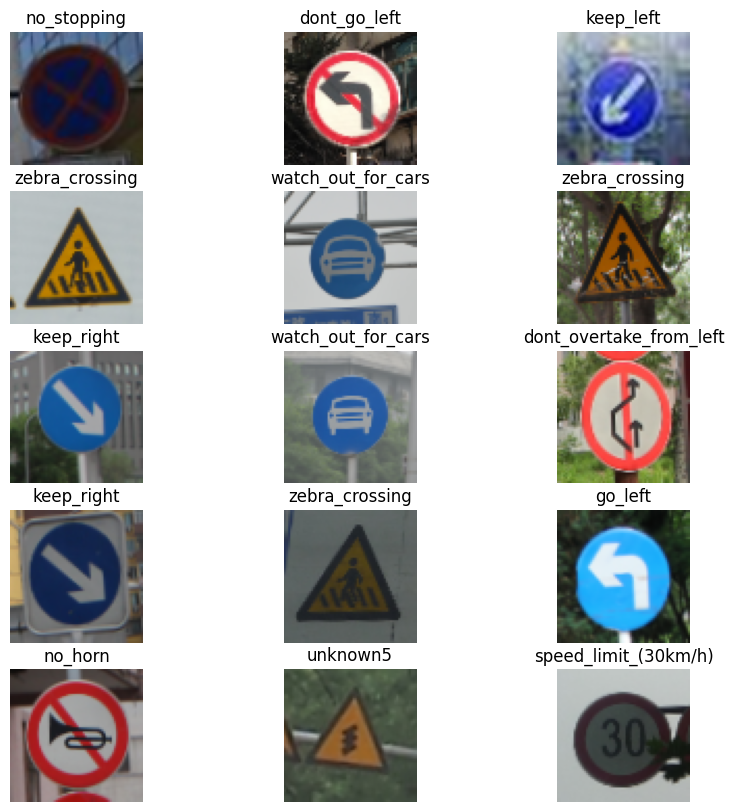

In [78]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(5, 3, i + 1)
        plt.title(class_decoder[class_names[labels[i]]])
        plt.imshow(np.array(images[i]))
        plt.axis("off")

plt.show()

# <font color='#F5DEB3'>2. **Инициализация ИНС**

In [79]:
# Создание модели с использованием Sequential()
model = Sequential()

model.add(Input(shape=(HEIGHT, WIDTH, num_of_channels)))
model.add(Conv2D(128, 3, strides=2, padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

for size in [256, 512, 728]:
    model.add(Conv2D(size, 3, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(Conv2D(size, 3, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

    model.add(MaxPooling2D(3, strides=2, padding="same"))

model.add(Conv2D(1024, 3, padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation=None))

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Model Compiled")

# Вывод архитектуры модели
model.summary()

Model Compiled


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 728)      │     3,355,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 728)      │         2,912 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 8, 8, 728)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 728)      │     4,770,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 728)      │         2,91

 Total params: 19,558,890 (74.61 MB)

 Trainable params: 19,550,602 (74.58 MB)

 Non-trainable params: 8,288 (32.38 KB)

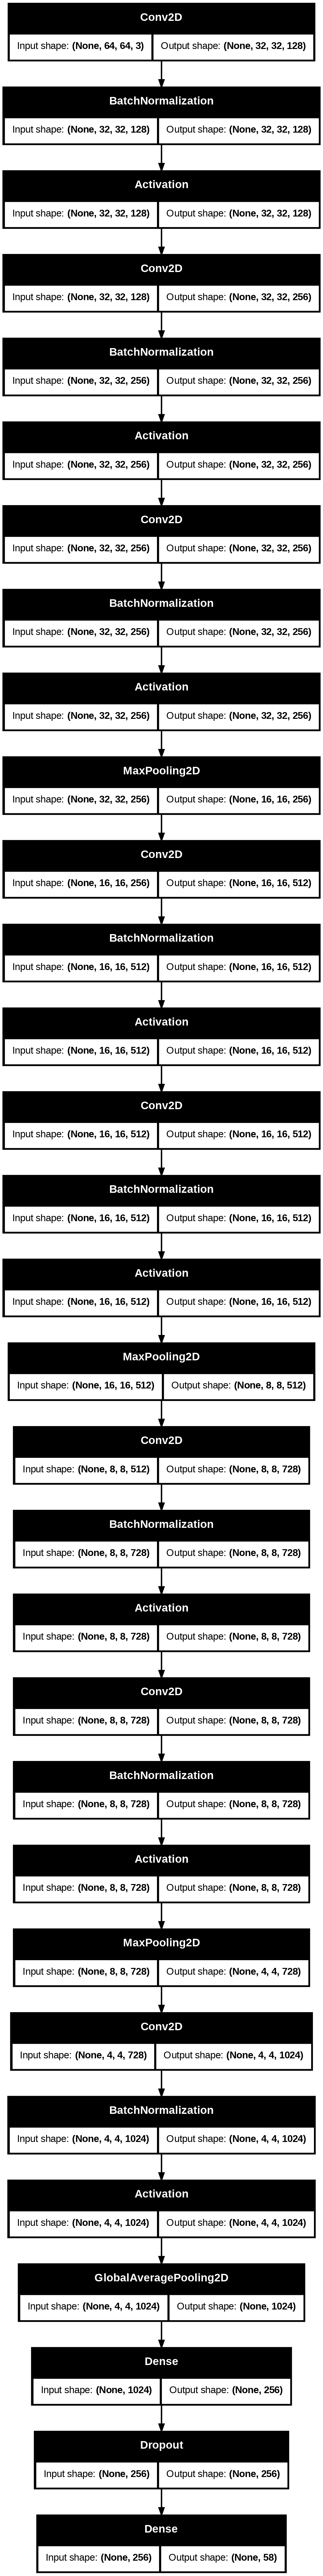

In [80]:
keras.utils.plot_model(model, show_shapes=True)

# <font color='#F5DEB3'>3. **Обучение модели**

In [81]:
EPOCHS = 25

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS)

print(f'Model Trained!')

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 221ms/step - accuracy: 0.2827 - loss: 3.0192 - val_accuracy: 0.0122 - val_loss: 4.0371
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.6439 - loss: 1.4007 - val_accuracy: 0.0156 - val_loss: 4.3113
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.8122 - loss: 0.7553 - val_accuracy: 0.0156 - val_loss: 4.5203
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.8946 - loss: 0.4418 - val_accuracy: 0.0573 - val_loss: 4.7791
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9405 - loss: 0.2771 - val_accuracy: 0.0573 - val_loss: 4.6960
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9632 - loss: 0.1734 - val_accuracy: 0.0712 - val_loss: 4.7205
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.9733 - loss: 0.1089 - val_accuracy: 0.0642 - val_loss: 4.2508
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 183ms/step - accuracy: 0.9819 - loss: 0.0831 - val_accur

# <font color='#F5DEB3'>4. **Валидация модели**

## <font color='#B8860B'>4.2 Валидация

In [82]:
validation_reults = model.evaluate(test_ds, return_dict=True)
validation_reults

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9937 - loss: 0.0159


{'accuracy': 0.9953846335411072, 'loss': 0.011015446856617928}

In [83]:
class_decoder = {'10': 'speed_limit_(5km/h)',
                 '11': 'speed_limit_(15km/h)',
                 '12': 'speed_limit_(30km/h)',
                 '13': 'speed_limit_(40km/h)',
                 '14': 'speed_limit_(50km/h)',
                 '15': 'speed_limit_(60km/h)',
                 '16': 'speed_limit_(70km/h)',
                 '17': 'speed_limit_(80km/h)',
                 '18': 'dont_go_straight_or_left',
                 '19': 'dont_go_straight_or_right',
                 '20': 'dont_go_straight',
                 '21': 'dont_go_left',
                 '22': 'dont_go_left_or_right',
                 '23': 'dont_go_right',
                 '24': 'dont_overtake_from_left',
                 '25': 'no_uturn',
                 '26': 'no_car',
                 '27': 'no_horn',
                 '28': 'speed_limit_(40km/h)',
                 '29': 'speed_limit_(50km/h)',
                 '30': 'go_straight_or_right',
                 '31': 'go_straight',
                 '32': 'go_left',
                 '33': 'go_left_or_right',
                 '34': 'go_right',
                 '35': 'keep_left',
                 '36': 'keep_right',
                 '37': 'roundabout_mandatory',
                 '38': 'watch_out_for_cars',
                 '39': 'horn',
                 '40': 'bicycles_crossing',
                 '41': 'uturn',
                 '42': 'road_divider',
                 '43': 'traffic_signals',
                 '44': 'danger_ahead',
                 '45': 'zebra_crossing',
                 '46': 'bicycles_crossing',
                 '47': 'children_crossing',
                 '48': 'dangerous_curve_to_the_left',
                 '49': 'dangerous_curve_to_the_right',
                 '50': 'unknown1',
                 '51': 'unknown2',
                 '52': 'unknown3',
                 '53': 'go_right_or_straight',
                 '54': 'go_left_or_straight',
                 '55': 'unknown4',
                 '56': 'zigzag_curve',
                 '57': 'train_crossing',
                 '58': 'under_construction',
                 '59': 'unknown5',
                 '60': 'fences',
                 '61': 'heavy_vehicle_accidents',
                 '62': 'unknown6',
                 '63': 'give_way',
                 '64': 'no_stopping',
                 '65': 'no_entry',
                 '66': 'unknown7',
                 '67': 'unknown8'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Class: no_uturn


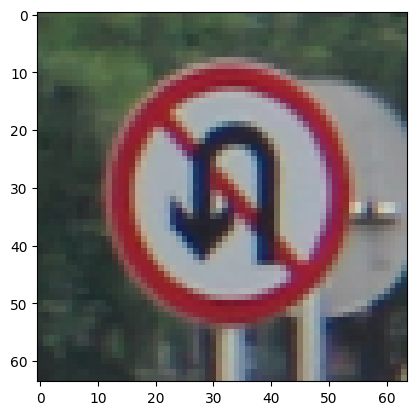

In [92]:
img = keras.utils.load_img("/content/trafic_signs_data/images/25/010.png", target_size=image_size)
plt.imshow(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = img_array / 255.0  # Нормализация значений пикселей
img_array = tf.expand_dims(img_array, 0)  # Добавление размерности батча

# Смещение меток
OFFSET = 10

# Предсказание класса
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Добавление смещения
adjusted_class = predicted_class + OFFSET

decoded_class = class_decoder[str(adjusted_class)]

print("Predicted Class:", decoded_class)

# <font color='#F5DEB3'>5. Построение графиков обучения

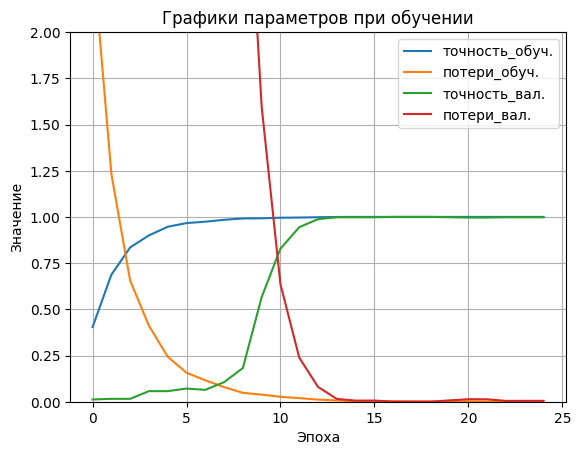

In [85]:
params = history.history.keys()
params = ['точность_обуч.', 'потери_обуч.', 'точность_вал.', 'потери_вал.']

for i in history.history.keys():
    plt.plot(history.history[i])

plt.title('Графики параметров при обучении')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.grid(True)
plt.ylim(0, 2)
plt.legend(params, loc='upper right')  # upper left
plt.savefig(f'history.png')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


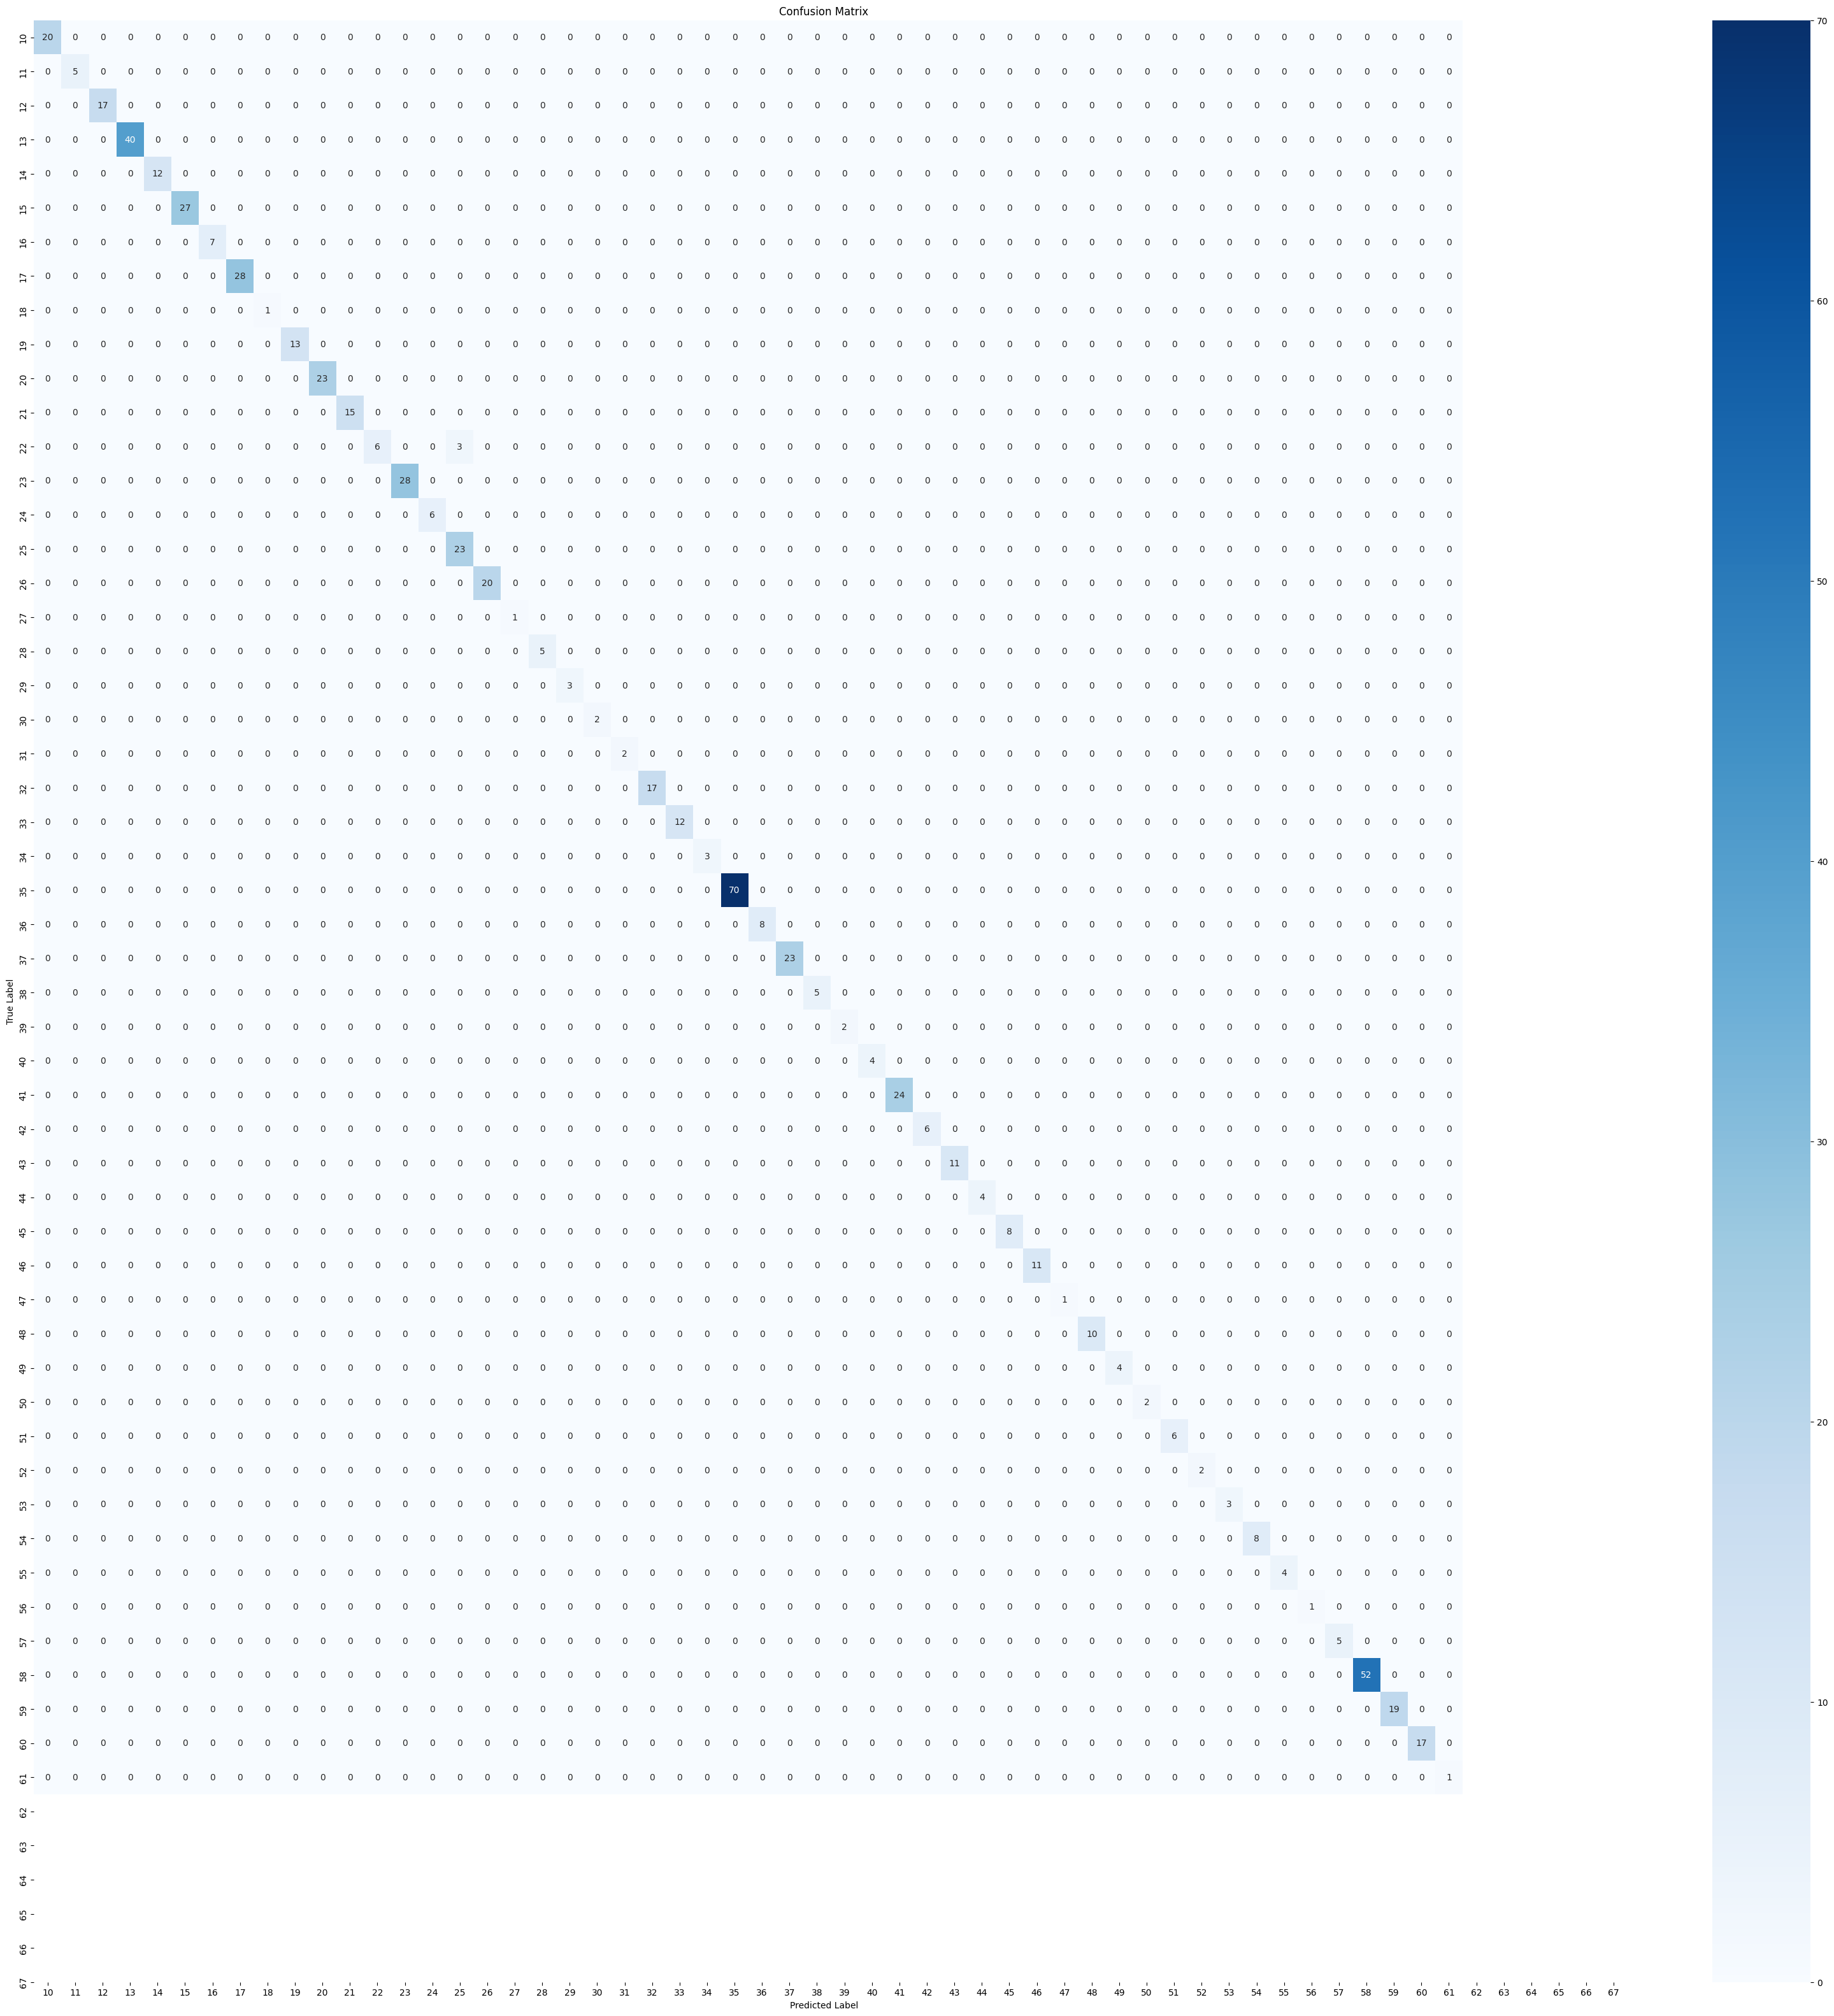

In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Получение истинных меток и предсказаний
y_true = []  # Список истинных меток
y_pred = []  # Список предсказанных меток

for images, labels in test_ds:  # Перебираем тестовый датасет
    predictions = model.predict(images)  # Предсказываем метки
    predicted_classes = np.argmax(predictions, axis=1)  # Преобразуем логиты в индексы классов
    y_true.extend(labels.numpy())  # Добавляем истинные метки
    y_pred.extend(predicted_classes)  # Добавляем предсказанные метки

# 2. Построение матрицы ошибок
conf_matrix = confusion_matrix(y_true, y_pred)

# 3. Визуализация матрицы ошибок
plt.figure(figsize=(40, 40))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()